In [ ]:
#Model used in Multiclass Logistic Regression 
#Reason:
#1) when I tried bert for deep-learning it was taking input not all at once but in small amount making training of the model time consuming
#2) Random-forest technique was less accuracy and pression so i do not use it

In [43]:
#adding all necessary library for nlp
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import torch

In [45]:
#declaring all list
a = []
list1 = []
list2 = []
list3 = []
list4 = []
#all stopwords list 
b = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
#oppening the csv file
with open('complaints.csv', newline='') as csvfile:
    data = csv.reader(csvfile)
    for row in data:
        a.append(row)

In [47]:
#function for training the model
def training(df):
    #load the function TfidfVectorizer in tfidf
    tfidf = TfidfVectorizer(max_features=1000)
    #tranforming dataframe column list into vectorize number form
    X = tfidf.fit_transform(df['list']).toarray()
    #try to open the tensor file and if open concat with current dataset
    try:
        loaded_tfidf_tensor = torch.load('tfidf_tensor.pt', weights_only=True)
        X = torch.cat((tensor_features, tfidf_tensor), dim=1)
        print(end = '\n')
    except:
        print(end = '\n')
    #storing data frame column product in y
    y = df['product']
    #train_test_split  for generating valid number for multi class logistic regression
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #storing logisticregression function in logreg
    logreg = LogisticRegression(max_iter = 100000)
    logreg.fit(X_train, y_train)
    # trained model y_pred_logreg can for calculation of accurracy and all other stuff
    y_pred_logreg = logreg.predict(X_test)
    # save the tesnsor model in tensor file
    tfidf_tensor = torch.tensor(X)
    torch.save(tfidf_tensor, 'tfidf_tensor.pt')
    return y_pred_logreg, y_test, logreg, tfidf

In [49]:
#clearing of non-necessary characters from the column narrative
def clean(list):
    #using regex removing special character and number
    list = re.sub(r'[\d!@#\$%\^\(\)-_\+=\[\]\{\}\\\|;\:/\?\.,><`~]', '', list)
    #removing all stopwords
    words = list.split(' ')
    words = [x for x in words if x not in b]
    list4 = ' '.join(words)
    return list4

In [51]:
#routing system
def routing_auto(sen):
    #clean the sentence first
    complaint = clean(sen)
    #make it in vectorize form
    vector = tfidf.transform([complaint])
    #finally predicting in which class does it belong
    obv_haki = model.predict(vector)
    return obv_haki

In [53]:
#feedback taking analysis function
def feedback(sen, pred, actual):
    #declaring to take df from global prepective
    global df
    #checking if pred is equal to actual if yes then everything remain same else train the model again
    if pred == actual:
        print("You have misunderstood the predicted and actual department are same", end = '\n')
        return training(df)
    else:
        print("Sorry for inconvenience. We Will look forward not to make mistake in future", end = '\n')
        complaint = clean(sen)
        data = {'product': actual, 'narrative': sen, 'list': complaint}
        row = pd.DataFrame([data])
        df = pd.concat([df, row], ignore_index=True)
        return training(df)

In [55]:
#sperating all rows and make list of each by spliting them with ','
for i in range(len(a)):
    for lists in a[i]:
        list1.append(lists.split(','))
j = 1
#storing the narrative column in dataset in list2
#storing the product column in dataset in list3
for lists in list1:
    for words in lists:
        if j % 3 == 0:
            list2.append(words)
        if j % 3 == 2:
            list3.append(words)
        j += 1
#since list2 and list3 will all contain narrative and product as first element of list hence removing them
list2.pop(0)
list3.pop(0)
#creating a data frame of the list for next process
df = pd.DataFrame({
    'product': list3,
    'narrative': list2
})
print(df.info(), end = '\n')
print(df.shape, end = '\n')
print(df.head(), end = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162421 non-null  object
 1   narrative  162421 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB
None
(162421, 2)
            product                                          narrative
0       credit_card  purchase order day shipping amount receive pro...
1       credit_card  forwarded message date tue subject please inve...
2    retail_banking  forwarded message cc sent friday pdt subject f...
3  credit_reporting  payment history missing credit report speciali...
4  credit_reporting  payment history missing credit report made mis...


In [57]:
#creating new column named list in df(dataframe) 
df['list'] = df['narrative'].apply(clean)
print(df.info(), end = '\n')
print(df.shape, end = '\n')
print(df.head(), end = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162421 non-null  object
 1   narrative  162421 non-null  object
 2   list       162421 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB
None
(162421, 3)
            product                                          narrative  \
0       credit_card  purchase order day shipping amount receive pro...   
1       credit_card  forwarded message date tue subject please inve...   
2    retail_banking  forwarded message cc sent friday pdt subject f...   
3  credit_reporting  payment history missing credit report speciali...   
4  credit_reporting  payment history missing credit report made mis...   

                                                list  
0  purchase order day shipping receive product we...  
1  forwarded message tue subject investigate come...  
2  forwarded message fr

In [59]:
#calling the function training to get the trained model, pred and test for getting accuracy and tfidf for vector conversion
pred, test, model, tfidf = training(df)

In [61]:
sen = input("Enter Your complaint:")
print(end = '\n')
#putting the input of sen in routing to see what the model will predict
obv_haki = routing_auto(sen)
print("The Comaplaint belong to ", obv_haki, end = '\n')
actual = input("Please Enter feedback among the five option: credit reporting, debt collection,  mortgages and loans, credit cards and retail banking")
print(end = '\n')
option = ['credit_reporting', 'debt_collection',  'mortgages_and_loans', 'credit_cards', 'retail_banking']
actual = '_'.join(actual.split())
#cheking if the input is from option for not
while True:
    if actual not in option:
        actual = input("Oops wrong input please try from this options: credit reporting, debt collection,  mortgages and loans, credit cards and retail banking")
        print(end = '\n')
        continue
    else:
        break
#calling the feedback function
pred, test, model, tfidf = feedback(sen, obv_haki, actual)

Enter Your complaint: purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged 


The Comaplaint belong to  ['credit_card']


Please Enter feedback among the five option: credit reporting, debt collection,  mortgages and loans, credit cards and retail banking credit cards



Sorry for inconvenience. We Will look forward not to make mistake in future



Logistic Regression Accuracy: 0.8537786670771125
Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.77      0.75      0.76      3247
   credit_reporting       0.89      0.93      0.91     18095
    debt_collection       0.78      0.69      0.73      4605
mortgages_and_loans       0.83      0.81      0.82      3788
     retail_banking       0.84      0.85      0.84      2750

           accuracy                           0.85     32485
          macro avg       0.82      0.80      0.81     32485
       weighted avg       0.85      0.85      0.85     32485




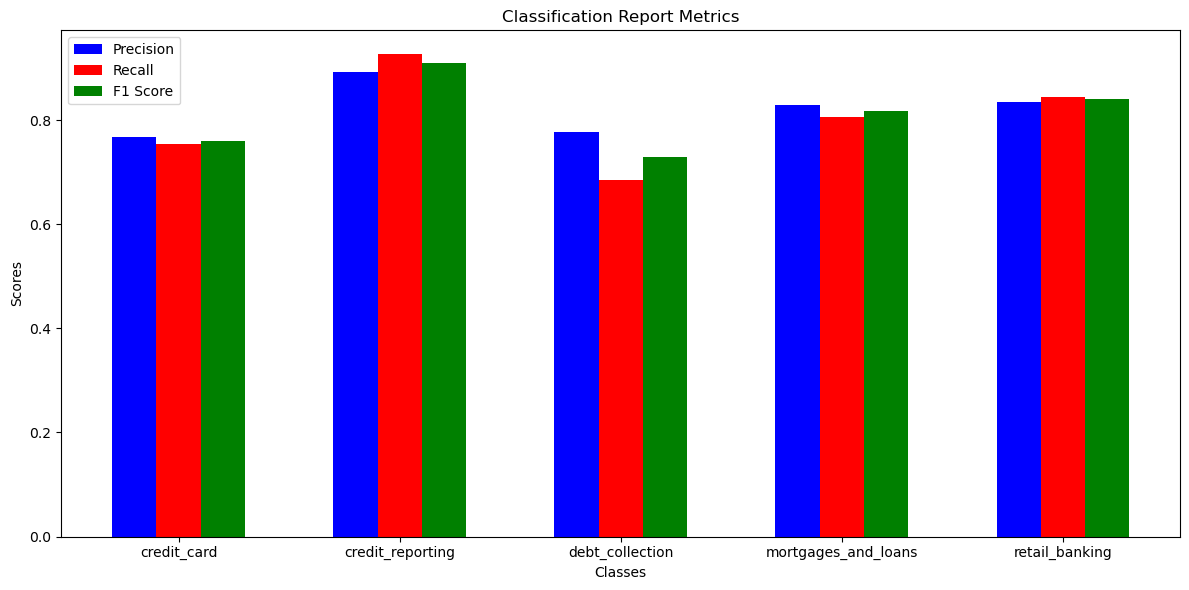

In [63]:
#showing the accuracy of the model
print('Logistic Regression Accuracy:', accuracy_score(test, pred), end = '\n')
#showing the classification report of the model
print('Classification Report:\n', classification_report(test, pred), end = '\n')
#sometimes it was giving me the error list cannot proccessed so using this code removing the ambuigity
try:
    del list
    print(end = '\n')
except:
    print(end = '\n')
#getting the classifiction report in report
report = classification_report(test, pred, output_dict=True)
#converting this into class
#cannot take accuracy because it does not got preccision
classes = list(report.keys())[:-3]
#creating all name for columns in class
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]
support = [report[cls]['support'] for cls in classes]
bar_width = 0.2
x = np.arange(len(classes))
#declaring the size of the plot
fig, ax = plt.subplots(figsize=(12, 6))
#declaring where the property should be shown
ax.bar(x - bar_width, precision, width=bar_width, label='Precision', color='blue')
ax.bar(x, recall, width=bar_width, label='Recall', color='red')
ax.bar(x + bar_width, f1_score, width=bar_width, label='F1 Score', color='green')
#not ploting support because of its high value else other will get neglected in plot
#setting x and y labels and also the title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
plt.tight_layout()
#finally showing the graph
plt.show()